# imports 

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import urllib.request

# 회귀분석 

`1--7`. 아래의 모형을 고려하자. 

- $y_i = 2+3x_i +\epsilon_i,\quad \epsilon_i \overset{iid}{\sim} N(0,1)$

$x_i$는 아래와 같이 주어졌다고 가정하자. 

In [86]:
x =  np.array([0.00983, 0.01098, 0.02951, 0.0384 , 0.03973, 0.04178, 0.0533 ,
               0.058  , 0.09454, 0.1103 , 0.1328 , 0.1412 , 0.1497 , 0.1664 ,
               0.1906 , 0.1923 , 0.198  , 0.2141 , 0.2393 , 0.2433 , 0.3157 ,
               0.3228 , 0.3418 , 0.3552 , 0.3918 , 0.3962 , 0.4    , 0.4482 ,
               0.496  , 0.507  , 0.53   , 0.5654 , 0.582  , 0.5854 , 0.5854 ,
               0.6606 , 0.7007 , 0.723  , 0.7305 , 0.7383 , 0.7656 , 0.7725 ,
               0.831  , 0.8896 , 0.9053 , 0.914  , 0.949  , 0.952  , 0.9727 ,
               0.982  ])

`1`. 제시된 모형에 맞추어서 $y_i$를 생성하라. $(x_i,y_i)$를 산점도를 이용하여 시각화하라. 

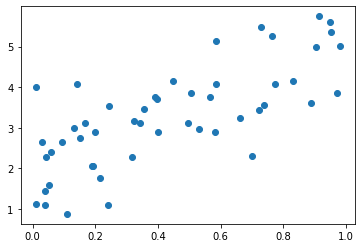

In [309]:
# 시각화예시

(풀이)

`2`. `1`과 같은 자료를 잘 표현할 수 있는 적절한 추세선 $(x_i, \hat{y}_i)$를 그리기 위하여 아래의 모형을 가정하자. 

- $\hat{y}_i = ax_i+b$

`(a)` $a=1$, $b=0$ 으로 선택 $\Rightarrow$ 추세선을 $\hat{y}_i = x_i$ 로 선택. 

`(b)` $a=2.5$, $b=2$ 으로 선택 $\Rightarrow$ 추세선을 $\hat{y}_i = 2.5 x_i + 2$ 로 선택. 

`(c)` $a=3$, $b=2$ 로 선택 $\Rightarrow$ 추세선을 $\hat{y}_i = 3 x_i + 2$ 로 선택. 

어떠한 추세선이 가장 옳은 선택일까? 각각의 선택에 대한 $(x_i, \hat{y}_i)$를 $(x_i,y_i)$와 겹쳐서 그려보고 스스로 생각해보라. 

(풀이) 

`3`. 아래를 각각 계산하라. 

`(a)` $\frac{1}{n}\sum_{i=1}^{n}(y_i-x_i)^2$

`(b)` $\frac{1}{n}\sum_{i=1}^{n}(y_i-2-2.5x_i)^2$

`(c)` $\frac{1}{n}\sum_{i=1}^{n}(y_i-2-3x_i)^2$

가장 작은 값을 가지는 것은 무엇인가? 

`4`. 3의 결과를 근거로 (a)-(c)중 가장 적절한 추세선을 판단하고 적절한 순서대로 나열하라. 

`(풀이)`

3-(a),(b),(c)는 각각 

- $\hat{y}_i=x_i$
- $\hat{y}_i=2+2.5x_i$
- $\hat{y}_i=2+3x_i$ 

일 경우 

$${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y}) = \frac{1}{n}\sum_{i=1}^{n}(y_i -\hat{y}_i)^2$$

를 계산한 것이라 해석할 수 있다. 그런데 ${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y})$의 값은 

- $y_1 \approx \hat{y}_1$ 
- $y_2 \approx \hat{y}_2$ 
- $\dots$ 
- $y_n \approx \hat{y}_n$ 

일수록 작은 값을 가진다. 그리고 위의 조건은 더 적절하게 추세선을 그렸을때 만족된다. 요약하면 

- 적절한 추세선을 그림 $\Rightarrow$ $y_i \approx \hat{y}_i$ $\Rightarrow$ ${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y})$ 값이 작아짐 

와 같은 관계가 있음을 파악할 수 있다. 따라서 ${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y})$의 값이 작을수록 적절한 추세선이라 생각할 수 있다. 

`5`. 아래와 같은 수식을 이용하여 $\hat{\beta}_0, \hat{\beta}_1$ 을 계산하라. 

$$\begin{bmatrix} \hat{\beta}_0 \\ \hat{\beta}_1 \end{bmatrix} = ({\bf X}^T {\bf X})^{-1}{\bf X}^T {\boldsymbol y}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n \end{bmatrix}$$ 

`(풀이)`

`6`. `4`에서 계산된 $\hat{\beta}_0, \hat{\beta}_1$을 각각 $b=\hat{\beta}_0, a=\hat{\beta}_1$으로 생각하고 적절한 추세선 $(x_i, y_i)$를 그려라. (단, $y_i=ax_i+b$ 이다) 

`7`. 4의 기준에 따르면, $(a,b)=(3,2)$ 일때 만들어지는 추세선과 $(a,b)=(\hat{\beta}_1,\hat{\beta}_0)$ 일때 만들어지는 추세선은 어떤 것이 더 적절한가? 

# MNIST data

아래는 0~9가지의 숫자이미지가 저장된 이미지데이터를 불러오는 코드이다. 

In [6]:
# URL 설정
url = 'https://github.com/guebin/PP2023/raw/main/posts/02_PY4DS/mnist.npz'

# URL에서 파일 다운로드
urllib.request.urlretrieve(url, './mnist.npz')

# 데이터 로드
data = np.load('./mnist.npz')
xtrain, ytrain, xtest, ytest = data['x_train'], data['y_train'], data['x_test'], data['y_test']

In [3]:
xtest.shape

(10000, 28, 28)

아래는 데이터에 대한 설명이다. 

- 전체의 이미지의 수는 70000개이며, 60000개의 이미지 ${\tt xtrain}$에 10000개의 이미지는 ${\tt xtest}$에 저장되어 있다. 
- 이미지에 대한 라벨은 각각 ${\tt ytrain}$과 $\tt ytest$에 저장되어 있다. 따라서 $\tt ytrain$에는 60000개의 이미지에 해당하는 라벨이, $\tt ytest$에는 10000개의 이미지에 해당하는 라벨이 기록되어 있다. 
- 보통 분석에서는 60000개의 이미지를 가지고 라벨을 맞추는 "훈련"을 하고 (${\tt xtrain}$을 이용하여 ${\tt ytrain}$을 맞추는 방법을 학습하고), 그러한 훈련이 잘 되었는지 10000개의 이미지를 이용하여 "테스트"한다. 
- 위와 같은 의미로 $({\tt xtrain}, {\tt ytrain})$ 을 training data set, $({\tt xtest},{\tt ytest})$ 를 test data set 이라고 부른다. (ref: [위키참고](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets))

아래는 이미지자료와 시각화에 대한 설명이다. 

- 각 이미지는 (28,28) 픽셀의 흑백미지이다. 따라서 각 이미지는 (28,28,3) 이 아니라 (28,28) 의 shape을 가진 텐서로 구성되어있다. 
- 흑백이미지를 시각화 하기 위해서는 `plt.imshow(img, cmap='gray')`를 이용한다. 여기에서 ${\tt img}$은 임의의 2차원 텐서이며 이 예제의 경우 (28,28)의 shape을 가진다. 

아래는 ${\tt xtrain}$의 두번째 이미지, 즉 ${\tt xtrain[1,:,:]}$를 확인하는 코드의 예시이다. 

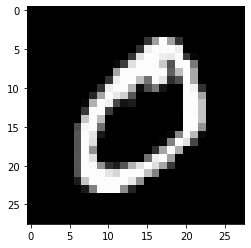

In [8]:
plt.imshow(xtrain[1,:,:],cmap='gray')
# plt.imshow(xtrain[1],cmap='gray') ## 같은코드임

이 이미지에 대한 label은 ${\tt ytrain[1]}$의 값으로 확인가능하다. 

In [9]:
ytrain[1]

0

이미지와 라벨을 한번에 표현하는 코드는 아래와 같이 작성가능하다. 

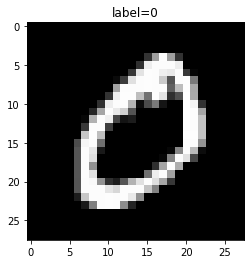

In [11]:
plt.imshow(xtrain[1],cmap='gray')
plt.title('label={}'.format(ytrain[1]));

아래는 10개의 이미지를 라벨과 함께 출력하는 코드의 예시이다. 

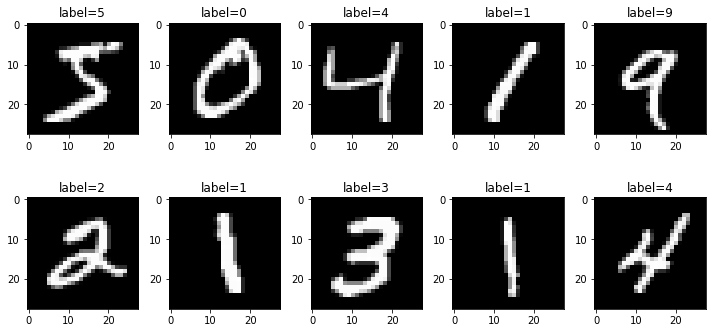

In [13]:
fig, ax = plt.subplots(2,5,figsize=(10,5))

ax[0][0].imshow(xtrain[0],cmap='gray'); ax[0][0].set_title('label={}'.format(ytrain[0]));
ax[0][1].imshow(xtrain[1],cmap='gray'); ax[0][1].set_title('label={}'.format(ytrain[1]));
ax[0][2].imshow(xtrain[2],cmap='gray'); ax[0][2].set_title('label={}'.format(ytrain[2]));
ax[0][3].imshow(xtrain[3],cmap='gray'); ax[0][3].set_title('label={}'.format(ytrain[3]));
ax[0][4].imshow(xtrain[4],cmap='gray'); ax[0][4].set_title('label={}'.format(ytrain[4]));

ax[1][0].imshow(xtrain[5],cmap='gray'); ax[1][0].set_title('label={}'.format(ytrain[5]));
ax[1][1].imshow(xtrain[6],cmap='gray'); ax[1][1].set_title('label={}'.format(ytrain[6]));
ax[1][2].imshow(xtrain[7],cmap='gray'); ax[1][2].set_title('label={}'.format(ytrain[7]));
ax[1][3].imshow(xtrain[8],cmap='gray'); ax[1][3].set_title('label={}'.format(ytrain[8]));
ax[1][4].imshow(xtrain[9],cmap='gray'); ax[1][4].set_title('label={}'.format(ytrain[9]));

fig.tight_layout()


`(1)` 70000개의 이미지중 0~9에 해당하는 이미지는 각각 몇장씩 들어있는가? 

`(2)` ${\tt xtrain}$에서 손글씨 0을 의미하는 이미지만을 모아서 새로운 텐서 ${\tt xtrain0}$를 만들어라. 이 텐서에서 처음과 마지막 이미지를 출력하라. 

**hint:** ${\tt xtrain0}$ 의 shape은 (5923,28,28)이어야 한다. 

`(3)` ${\tt xtrain}$에서 손글씨 0을 의미하는 이미지의 평균을 계산하라. 즉 아래를 계산하라. 

- ${\tt xtrain0mean} = \frac{1}{5923}\sum_{i=1}^{5923} {\tt xtrain0[i, :, :]}$

계산결과를 출력하라. 

`(4)` ${\tt xtrain}$에서 각 라벨에 대한 평균이미지를 계산하고 계산결과를 ${\tt imgmean}$에 길이가 10인 `list`로 저장하라. 즉 ${\tt imgmean}$은 아래와 같은 자료구조를 가지고 있어야 한다. 

- ${\tt imgmean}=\big[{\tt imgmean[0]},\dots, {\tt imgmean[9]}\big]$ 
- ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 (28,28)의 shape을 가진 numpy array 
- ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 숫자 0,1, ..., 9의 평균이미지를 의미

${\tt imgmean[0]},\dots, {\tt imgmean[9]}$를 시각화 하라. 

`(5)` ${\tt xtrain}$의 두번째 이미지와 ${\tt imgmean[0]}$의 차이를 제곱한 값의 평균을 구하라. 즉 아래를 계산하라. 

- $\frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[1,p,q]}-{\tt imgmean[0][p,q]}\big)^2$

`(6)` 모든 $j=0,1,\dots,9$ 에 대하여 아래를 계산하라. 

- $\frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[1,p,q]}-{\tt imgmean[j][p,q]}\big)^2$

계산값이 가장 작게 나오는 $j$는 얼마인가? 위의 계산결과를 토대로 ${\tt xtrain}$의 두번째 이미지는 어떠한 숫자를 의미한다고 "분류"하는 것이 타당한가? 

`(7)` 아래와 같은 numpy array 를 생성하라. 

$${\tt loss}= 
\begin{bmatrix} 
{\tt loss[0,0]} & \dots & {\tt loss[0,9]} \\ 
{\tt loss[1,0]} & \dots & {\tt loss[1,9]} \\ 
\dots & \dots &  \dots \\ 
{\tt loss[59999,0]}& \dots &{\tt loss[59999,9]} \\ 
\end{bmatrix}$$

단, ${\tt loss[i,j]} = \frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[i,p,q]}-{\tt imgmean[j][p,q]}\big)^2$

위에서 생성한 ${\tt loss}$를 이용해 (6)와 같은 방식으로 ${\tt xtrain}$의 모든 이미지에 대한 분류를 수행하라. 

**hint**: ${\tt loss}$에서 "최소값을 가지는 원소의 인덱스를 출력"하는 함수를 각 행별로 적용하면 된다. 

`(8)` `(7)`에서 수행한 분류결과와 실제 라벨 ${\tt ytrain}$을 비교하라. 얼마나 많은 결과가 일치하는지 비율을 계산하라. 

`(9)` ${\tt xtrain}$에서 학습한 평균이미지 ${\tt imgmean}$를 바탕으로 ${\tt xtest}$의 이미지를 분류하라. 분류결과를 ${\tt ytest}$와 비교하라. 얼마나 많은 결과가 일치하는지 비율을 계산하라.

`(10)` `(9)`의 과정에서 잘못분류된 이미지 10개를 선택하여 시각화 하라. 

- 실제 라벨과 잘못된 라벨을 구분하여 시각화 할 것 

# FIFA23 자료분석 

아래는 FIFA23 자료를 불러오는 코드이다. 

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv').drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0


`(1)` 선수들의 평균임금(Wage)을 구하라. 

**hint**: ChatGPT를 이용하여 적절하게 자료를 변화하라. 

# 삼성전자와 SK하이닉스

`(1)` 삼성전자와 SK하이닉스의 주가를 load하는 코드를 작성하라. (ChatGPT활용) 

In [35]:
import yfinance as yf

# 삼성전자와 SK하이닉스의 종목 코드
tickers = ["005930.KS", "000660.KS"]

# 주가 데이터를 불러올 기간
start_date = "2021-01-01"
end_date = "2022-05-02"

# yfinance를 이용하여 데이터 다운로드
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
df.columns = pd.Index(['삼성전자','SK하이닉스']) 

# 데이터 확인
df

[*********************100%***********************]  2 of 2 completed


,삼성전자,SK하이닉스
Date,,
2021-01-04,122414.210938,79093.812500
2021-01-05,126786.156250,79951.460938
2021-01-06,127271.921875,78331.445312
2021-01-07,130672.304688,78998.515625
2021-01-08,134072.718750,84620.843750
...,...,...
2022-04-25,106475.500000,64666.238281
2022-04-26,109433.148438,64471.171875
2022-04-27,106968.437500,63398.273438
